In [7]:
import numpy as np
import pandas as pd
from subprocess import check_output

print(check_output(["ls", "/kaggle/input"]).decode("utf8"))

train_df = pd.read_csv('/kaggle/input/hyeoungkyu/train.csv')  # training dataframe
test_df = pd.read_csv('/kaggle/input/hyeoungkyu/test.csv')    # test dataframe

train_df.head()

hyeoungkyu



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


hyeoungkyu



/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


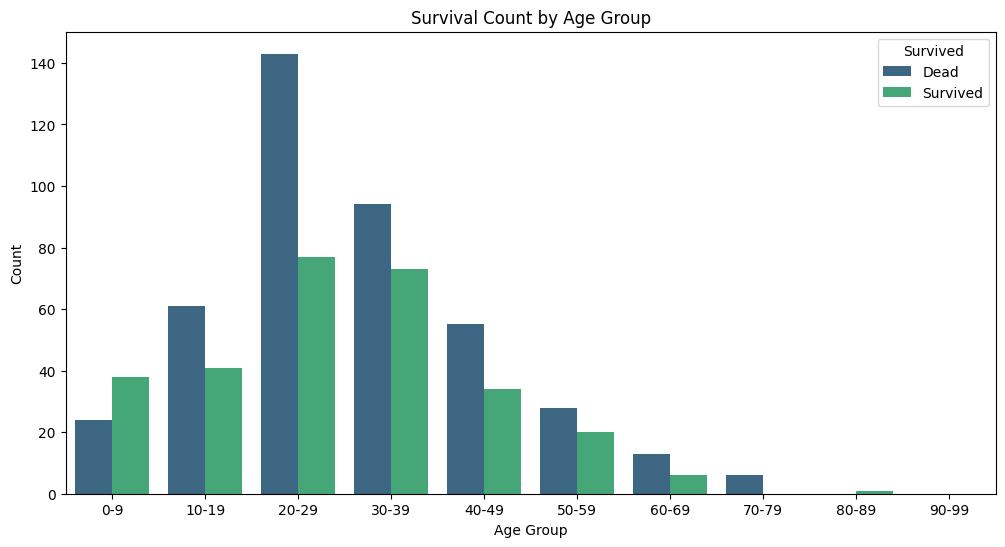

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

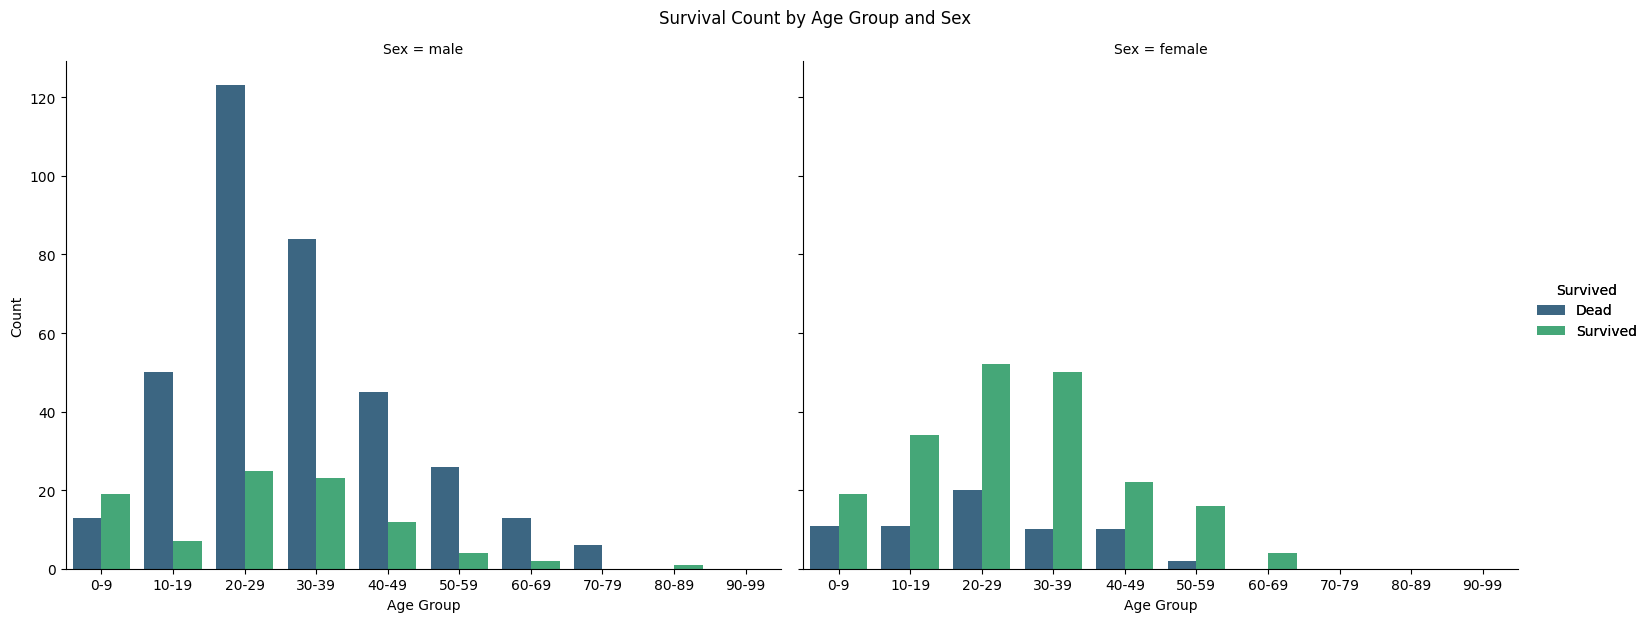

/tmp/ipykernel_33/3326293925.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival_rate = train_df.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack().reset_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


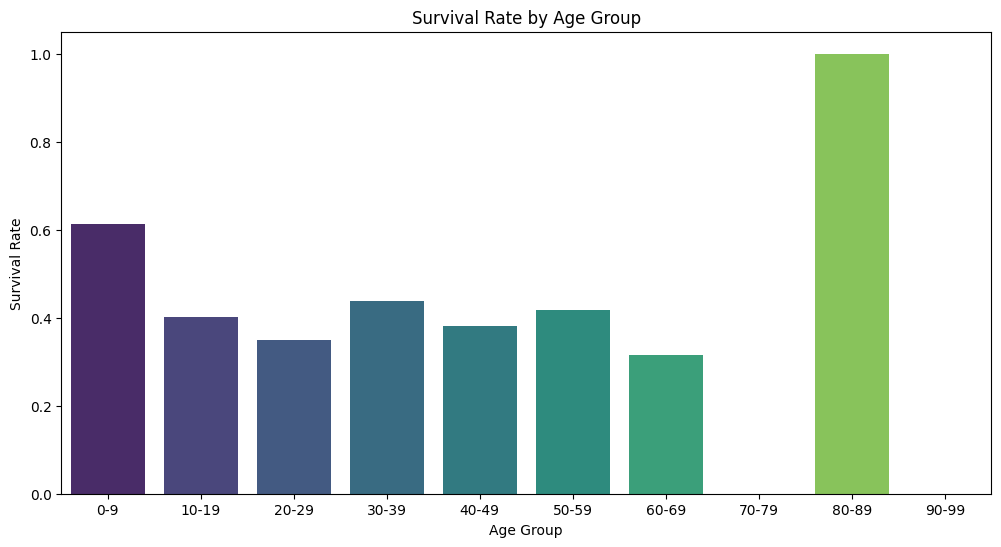

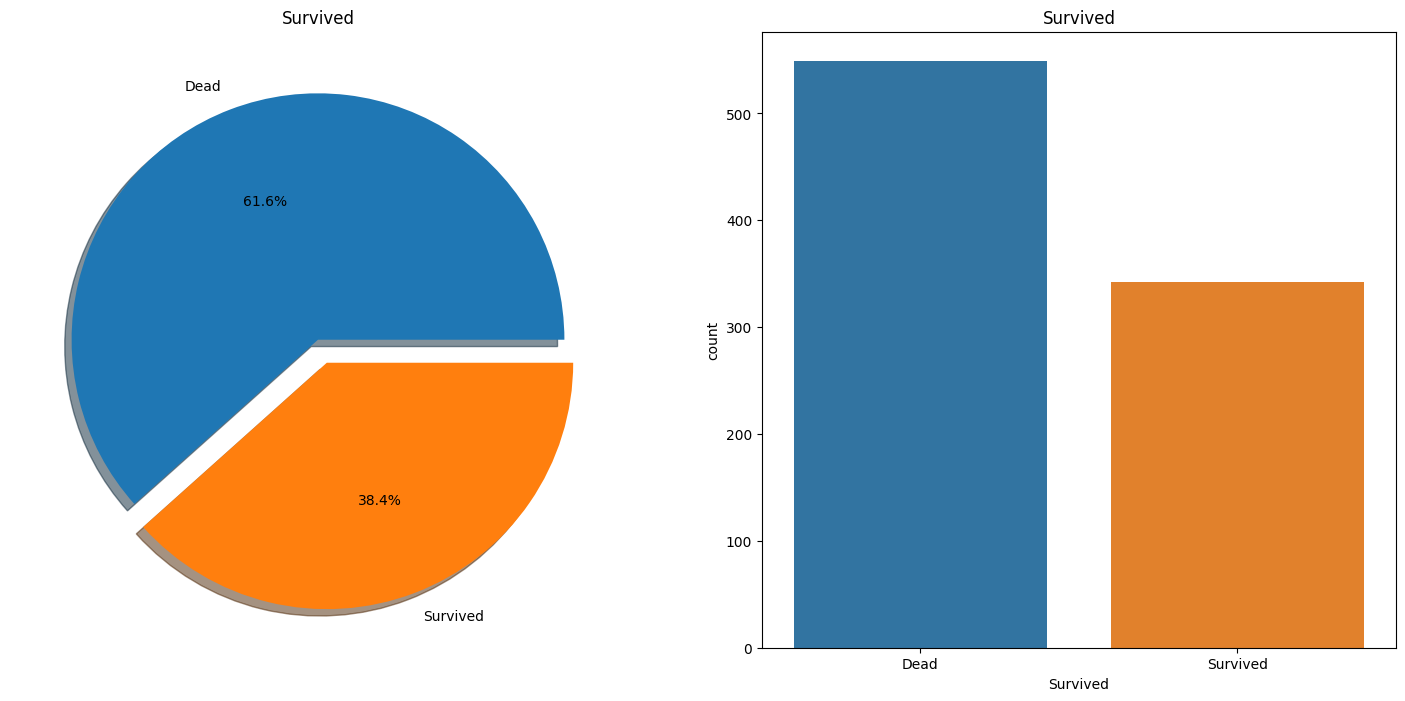

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

# 데이터 로드
print(check_output(["ls", "/kaggle/input"]).decode("utf8"))

train_df = pd.read_csv('/kaggle/input/hyeoungkyu/train.csv')  # training dataframe
test_df = pd.read_csv('/kaggle/input/hyeoungkyu/test.csv')    # test dataframe

# 데이터 확인
train_df.head()

# 'Survived' 열 변환
train_df['Survived'] = train_df['Survived'].map({0: 'Dead', 1: 'Survived'})

# 나이대 열 추가
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# 각 나이대 별 생존자 수 시각화 (성별 구분)
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='AgeGroup', hue='Survived', palette='viridis')
plt.title('Survival Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

# 성별에 따른 나이대 별 생존자 수 시각화
g = sns.catplot(data=train_df, x='AgeGroup', hue='Survived', col='Sex', kind='count', palette='viridis', height=6, aspect=1.2)
g.fig.suptitle('Survival Count by Age Group and Sex', y=1.03)
g.set_axis_labels('Age Group', 'Count')
g.add_legend(title='Survived')
plt.show()

# 각 나이대 별 생존율 시각화
age_group_survival_rate = train_df.groupby('AgeGroup')['Survived'].value_counts(normalize=True).unstack().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_survival_rate, x='AgeGroup', y='Survived', palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

# Pie chart 및 count plot
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart
train_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')

# Show plots
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

# 데이터 로드
print(check_output(["ls", "/kaggle/input"]).decode("utf8"))

train_df = pd.read_csv('/kaggle/input/hyeoungkyu/train.csv')  # training dataframe
test_df = pd.read_csv('/kaggle/input/hyeoungkyu/test.csv')    # test dataframe

# 데이터 확인
train_df.head()

# 'Survived' 열 변환
train_df['Survived'] = train_df['Survived'].map({0: 'Dead', 1: 'Survived'})

# 결측치 채우기
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# 필요한 열만 선택
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train_df['Survived'].map({'Dead': 0, 'Survived': 1})

# 훈련 데이터와 검증 데이터로 나누기
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

hyeoungkyu



In [7]:
# k-겹 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=200)

# 교차 검증 실행
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# 결과 출력
print(f"k-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

k-Fold Cross-Validation Scores: [0.81005587 0.78089888 0.83146067 0.76966292 0.7752809 ]
Mean CV Accuracy: 0.7934718473416609


In [8]:
# 부트스트랩 설정
n_iterations = 100
n_size = int(len(X) * 0.8)
bootstrap_scores = []

# 부트스트랩 실행
for i in range(n_iterations):
    # 샘플링
    X_train_resample, y_train_resample = resample(X_train, y_train, n_samples=n_size, random_state=i)
    
    # 모델 학습
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_resample, y_train_resample)
    
    # 검증
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    bootstrap_scores.append(accuracy)

# 결과 출력
bootstrap_scores = np.array(bootstrap_scores)
print(f"Bootstrap Scores: {bootstrap_scores}")
print(f"Mean Bootstrap Accuracy: {bootstrap_scores.mean()}")
print(f"Bootstrap Accuracy Standard Deviation: {bootstrap_scores.std()}")

Bootstrap Scores: [0.82122905 0.81005587 0.81564246 0.81564246 0.79888268 0.80446927
 0.80446927 0.80446927 0.78212291 0.79888268 0.79329609 0.78212291
 0.79329609 0.79329609 0.82122905 0.81005587 0.7877095  0.82681564
 0.7877095  0.82122905 0.83240223 0.80446927 0.79888268 0.82122905
 0.80446927 0.79329609 0.7877095  0.7877095  0.81564246 0.7877095
 0.83240223 0.82122905 0.81564246 0.82681564 0.80446927 0.81564246
 0.81005587 0.81005587 0.79329609 0.79329609 0.7877095  0.84357542
 0.82681564 0.82122905 0.79329609 0.78212291 0.79888268 0.82122905
 0.79888268 0.82122905 0.79329609 0.79329609 0.79888268 0.7877095
 0.79888268 0.83240223 0.81564246 0.79329609 0.83240223 0.81005587
 0.81005587 0.82122905 0.81005587 0.79888268 0.80446927 0.79888268
 0.80446927 0.80446927 0.78212291 0.79888268 0.79888268 0.80446927
 0.79329609 0.81005587 0.81564246 0.82681564 0.79329609 0.79329609
 0.79329609 0.7877095  0.79329609 0.79329609 0.79329609 0.79888268
 0.83240223 0.82681564 0.79888268 0.7877095  0